## Project Case Scenario
### Project Scenario: 
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?

* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_data = pd.read_csv("boston_housing.csv")

In [4]:
boston_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Generate Descriptive Statistics and Visualizations
### For all visualizations, please include a title in each graph and appropriate labels

### Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
 
* Create a histogram for the pupil to teacher ratio variable

#### To print boxplot we will use boxplot function from seaborn library

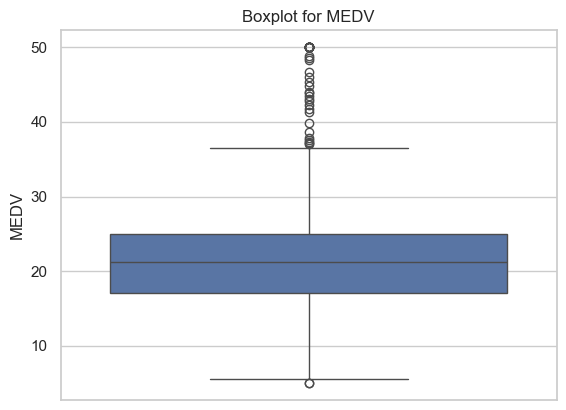

In [26]:
ax = sns.boxplot(y="MEDV", data=boston_data)
plt.title("Boxplot for MEDV")
plt.show()

#### There are some outliers after third quartile

#### To print barplot we will use barplot from seaborn library

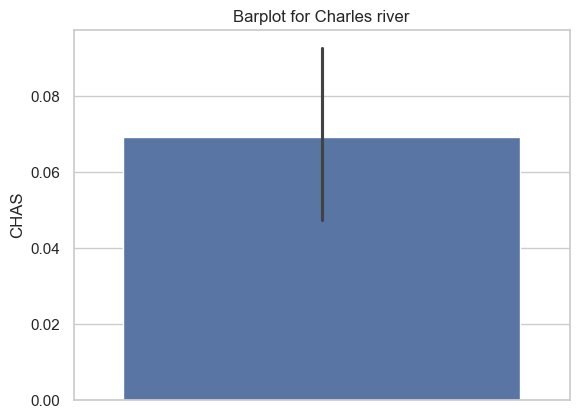

In [27]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_data)
plt.title("Barplot for Charles river")
plt.show()

#### Most properties in the dataset are not adjacent to the Charles River.

In [29]:
boston_data.loc[(boston_data['AGE'] <= 35), 'age_group']='35 years and younger'
boston_data.loc[(boston_data['AGE'] > 35)&(boston_data['AGE'] < 70), 'age_group'] ='between 35 and 70 years'
boston_data.loc[(boston_data['AGE'] >= 70), 'age_group'] = '70 years and older'
boston_data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,35 to 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,35 to 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,35 to 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,35 to 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years,35 to 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older,70 years and older


#### To print boxplot we will use boxplot from seaborn library

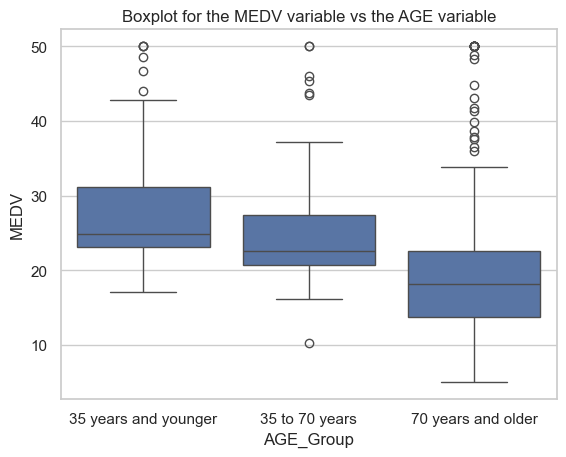

In [57]:
ax = sns.boxplot(x = 'AGE_Group', y= 'MEDV',data=boston_data)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

#### There are more outliers for 70 years and older group going for cheap houses and 35 years and younger have less outliers going for more price

#### To print scatterplot we will use scatterplot from seaborn library

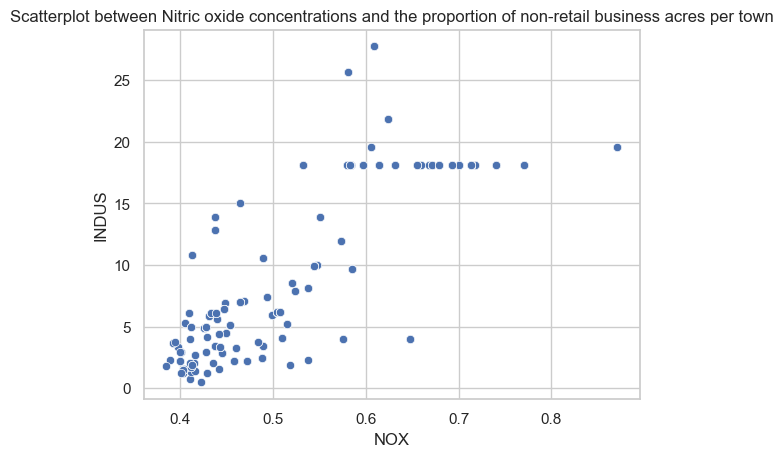

In [34]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_data)
plt.title('Scatterplot between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.show()

#### As NOX concentrations increase, the INDUS values generally seem to increase, indicating a positive relationship between the two variables.There are a few points with higher INDUS values (above 20) that stand out.

#### To print the histogram displot from seaborn library

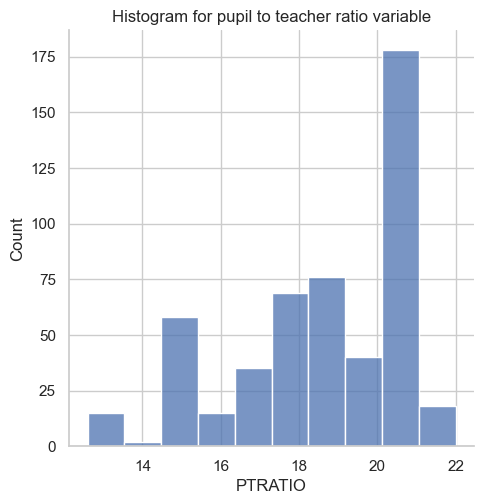

In [40]:
sns.displot(x=boston_data.PTRATIO,bins=10, kde=False)
plt.title("Histogram for pupil to teacher ratio variable")
plt.show()

#### The ratio is highest at 20-21 

### Use the appropriate tests to answer the questions provided.
### For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

## Question - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")


We can use the Levene's Test in Python to check test significance


In [44]:
scipy.stats.levene(boston_data[boston_data['CHAS'] == 1]['MEDV'],
                   boston_data[boston_data['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

#### Since pvalue is less than 0.05, we cant assume equality of variance

In [48]:
scipy.stats.ttest_ind(boston_data[boston_data['CHAS'] == 1]['MEDV'],
                   boston_data[boston_data['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### Since the p value is less than 0.05 we will reject the null hypothesis and there is a difference in median value houses bounded by the Charles river

## Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
State the hypothesis

- $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
- $H_1:$ At least one of the means differ

We can use the Levene's Test in Python to check test significance


In [63]:
scipy.stats.levene(boston_data[boston_data['age_group'] == '35 years and younger']['MEDV'],
                   boston_data[boston_data['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_data[boston_data['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

#### since the p-value is more than 0.05, the variance are equal

First, separate the three samples (one for each category) into a variable each.


In [51]:
thirtyfive_lower = boston_data[boston_data['age_group'] == '35 to 70 years']['MEDV']
thirtyfive_seventy = boston_data[boston_data['age_group'] == '35 to 70 years']['MEDV']
seventy_older = boston_data[boston_data['age_group'] == '70 years and older']['MEDV']

In [52]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is more than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


## Question:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis:
*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#### FIrst we will print scatterplot

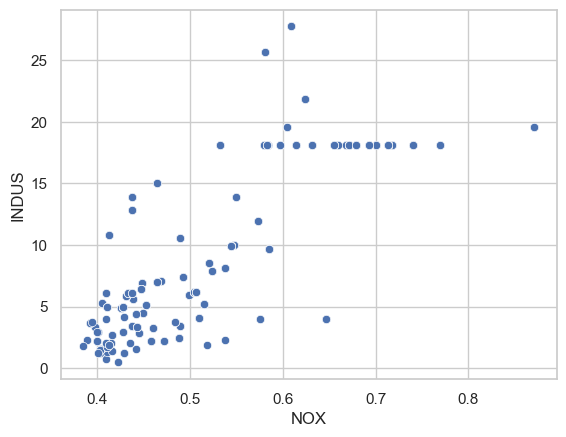

In [54]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_data)

#### We will use pearsonr from stats model to calculate pearson coefficient

In [55]:
scipy.stats.pearsonr(boston_data['NOX'], boston_data['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

**Conclusion:** Since the p-value is more than 0.05, we fail to reject  the Null hypothesis and conclude that there  is no relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

## Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
We will state the null hypothesis:
*   $H\_0: β1$ = 0 (There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (There is a impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes)


In [64]:
boston_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,35 to 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,35 to 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,35 to 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,35 to 70 years


#### We will use OLS from statsmodel.api and summary will print table

In [66]:
X = boston_data['MEDV']
## y is the target/dependent variable
y = boston_data['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        16:36:14   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is a impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes 
